In [11]:
import pymc as pm

lambda_ = pm.Exponential("poisson_parram", 1)

data_generater = pm.Poisson("data_generater", lambda_)
data_plus_one = data_generater + 1

print("Children of lambda_: ")
print(lambda_.children, "\n")

print("Parents of data_generater: ")
print(data_generater.parents, "\n")

print("Children of data_generater: ")
print(data_generater.children, "\n")

Children of lambda_: 
{<pymc.distributions.new_dist_class.<locals>.new_class 'data_generater' at 0x10a92ac50>} 

Parents of data_generater: 
{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_parram' at 0x10a92abe0>} 

Children of data_generater: 
{<pymc.PyMCObjects.Deterministic '(data_generater_add_1)' at 0x10a92acf8>} 



In [12]:
print("lambda_.value = ", lambda_.value)
print("data_generater.value = ", data_generater.value)
print("data_plus_one.value = ", data_plus_one.value)

lambda_.value =  0.47331786053969727
data_generater.value =  0
data_plus_one.value =  1


In [17]:
lambda_1 = pm.Exponential("lambda_1", 1)
lambda_2 = pm.Exponential("lambda_2", 1)
tau = pm.DiscreteUniform("tau", lower=0, upper=10)

print("Initialized values...")
print("lambda_1.value = ", lambda_1.value)
print("lambda_2.value = ", lambda_2.value)
print("tau.value = ", tau.value)

lambda_1.random()
lambda_2.random()
tau.random()

print()
print("After calling random() on the variables...")
print("lambda_1.value = ", lambda_1.value)
print("lambda_2.value = ", lambda_2.value)
print("tau.value = ", tau.value)

type(lambda_1 + lambda_2)

Initialized values...
lambda_1.value =  0.06945839826100902
lambda_2.value =  0.18577687512080296
tau.value =  6

After calling random() on the variables...
lambda_1.value =  0.9936315185194956
lambda_2.value =  0.6179034551132322
tau.value =  6


pymc.PyMCObjects.Deterministic

(0, 8)

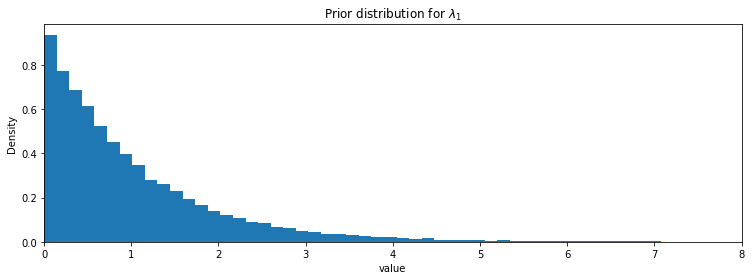

In [19]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
figsize(12.5, 4)

samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlabel("value")
plt.ylabel("Density")
plt.xlim(0, 8)

In [23]:
data = np.array([10, 5])
fixed_variable = pm.Poisson("fxd", 1, value=data, observed=True)
print("value: ", fixed_variable.value)
print("calling .random()")

fixed_variable.random() # make sure if the fixed_variable is really fixed or not 
print("value: ", fixed_variable.value)

value:  [10  5]
calling .random()
value:  [10  5]


In [24]:
data = np.array([10, 25, 15, 20, 35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print(obs.value)

[10 25 15 20 35]
